In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from toy_datasets import ToyDatasets

In [2]:
class Stage1Algorithm():
  def __init__(self, num_elements):
    self.num_elements = num_elements
    self.A = None

  def objective(self, A, x, y):
    A = A.reshape(-1, 1)
    result = y - np.dot(A, x)
    result = np.square(np.linalg.norm(result))
    return result.flatten()
  
  def fit(self, x, y):
    A_initial_guess = np.array([0])
    A = minimize(self.objective, A_initial_guess, args=(x, y))
    A = A.x.reshape(1, 1)
    self.A = A
  
  def predict(self, x):
    y_predicted = [0]
    y_predicted = np.dot(self.A, x)
    return y_predicted

  def forecast(self, x, timesteps):
    current_window = x[:, -self.ar_order:]
    forecasted = np.zeros((self.num_features, timesteps))
    for i in range(timesteps):
      next_el = (self.K @ current_window)[:, 0]
      forecasted[:, i] = next_el
      current_window = np.append(current_window, next_el)[:, 1:]
    return forecasted
  
  def evaluate(self, y, y_predicted):
    return np.sqrt(1/len(y) * np.sum(np.square(y - y_predicted)))

Without Noise parameters:  [[1.00396385]]
Without Noise MSE:  0.0226897184818321
Gaussian Noise parameters:  [[1.00339139]]
Gaussian Noise MSE:  1.3644306175594754
Non-Gaussian Noise parameters:  [[1.00457307]]
Non-Gaussian Noise MSE:  4.971244071736286
Both Noise parameters:  [[1.00297093]]
Both Noise MSE:  6.27808316016842


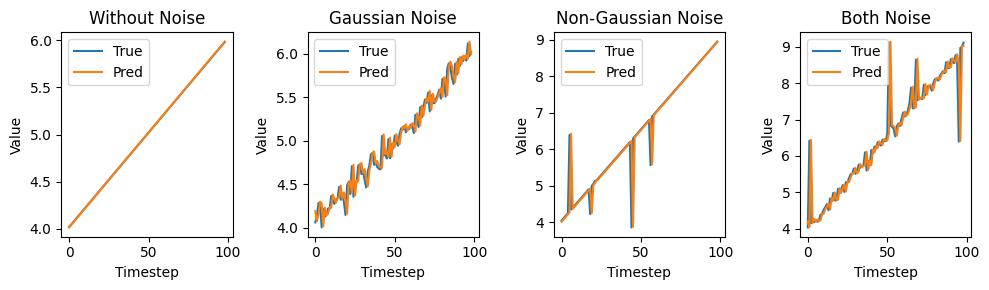

In [5]:
np.random.seed(0)
num_elements, num_features = 100, 1
toy_datasets = ToyDatasets(num_elements=num_elements, num_features=num_features)

datasets = [
  ("Without Noise", toy_datasets.linear_trending_without_noise().reshape(-1, 1).T), 
  ("Gaussian Noise", toy_datasets.linear_trending_with_gaussian_noise().reshape(-1, 1).T), 
  ("Non-Gaussian Noise", toy_datasets.linear_trending_with_non_gaussian_noise().reshape(-1, 1).T),
  ("Both Noise", toy_datasets.linear_trending_with_both_noise().reshape(-1, 1).T),
]
fig, ax = plt.subplots(nrows=1, ncols=len(datasets), figsize=(10, 3))
for i, (title, ds) in enumerate(datasets):
  x, y = ds[:, :-1], ds[:, 1:]

  alg = Stage1Algorithm(num_elements=num_elements)
  alg.fit(x, y)
  ax[i].plot(y.flatten(), label="True")
  
  y_predicted = alg.predict(x)
  ax[i].plot(y_predicted.flatten(), label="Pred")
  ax[i].set_title(title)
  ax[i].set_xlabel("Timestep")
  ax[i].set_ylabel("Value")
  ax[i].legend()

  print(f"{title} parameters: ", alg.A)

  accuracy = alg.evaluate(y, y_predicted)
  print(f"{title} MSE: ", accuracy)

plt.tight_layout()
plt.show()

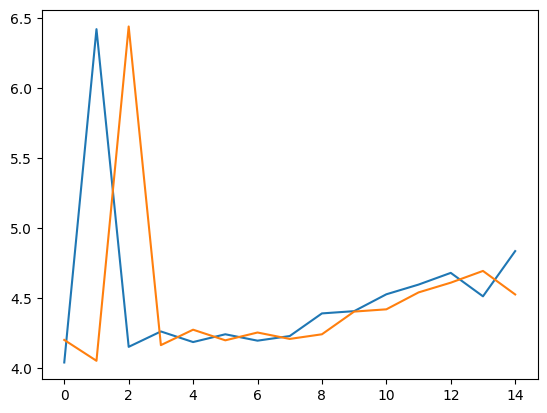

In [12]:
plt.plot(y.flatten()[0:15], label="True")
plt.plot(y_predicted.flatten()[0:15], label="Pred")

Without Noise parameters:  [[0.99910058]]
Without Noise MSE:  0.7160666496956
Gaussian Noise parameters:  [[0.99850374]]
Gaussian Noise MSE:  1.5317678092928702
Non-Gaussian Noise parameters:  [[0.9972271]]
Non-Gaussian Noise MSE:  3.237224277625725
Both Noise parameters:  [[0.99665951]]
Both Noise MSE:  3.680351797093655


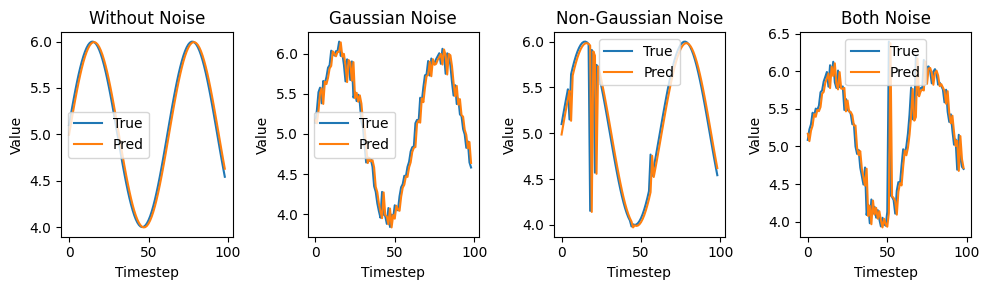

In [13]:
np.random.seed(0)
num_elements, num_features = 100, 1
toy_datasets = ToyDatasets(num_elements=num_elements, num_features=num_features)

datasets = [
  ("Without Noise", toy_datasets.periodical_sinusoidal_without_noise().reshape(-1, 1).T), 
  ("Gaussian Noise", toy_datasets.periodical_sinusoidal_with_gaussian_noise().reshape(-1, 1).T), 
  ("Non-Gaussian Noise", toy_datasets.periodical_sinusoidal_with_non_gaussian_noise().reshape(-1, 1).T),
  ("Both Noise", toy_datasets.periodical_sinusoidal_with_both_noise().reshape(-1, 1).T),
]
fig, ax = plt.subplots(nrows=1, ncols=len(datasets), figsize=(10, 3))
for i, (title, ds) in enumerate(datasets):
  x, y = ds[:, :-1], ds[:, 1:]

  alg = Stage1Algorithm(num_elements=num_elements)
  alg.fit(x, y)
  ax[i].plot(y.flatten(), label="True")
  
  y_predicted = alg.predict(x)
  ax[i].plot(y_predicted.flatten(), label="Pred")
  ax[i].set_title(title)
  ax[i].set_xlabel("Timestep")
  ax[i].set_ylabel("Value")
  ax[i].legend()

  print(f"{title} parameters: ", alg.A)

  accuracy = alg.evaluate(y, y_predicted)
  print(f"{title} MSE: ", accuracy)

plt.tight_layout()
plt.show()